# Text Classification:

## Data
<pre>
1. we have total of 20 types of documents(Text files) and total 18828 documents(text files).
2. You can download data from this <a href='https://drive.google.com/open?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM'>link</a>, in that you will get documents.rar folder. <br>If you unzip that, you will get total of 18828 documnets. document name is defined as'ClassLabel_DocumentNumberInThatLabel'. 
so from document name, you can extract the label for that document.
4. Now our problem is to classify all the documents into any one of the class.
5. Below we provided count plot of all the labels in our data. 
</pre>

<IPython.core.display.Javascript object>


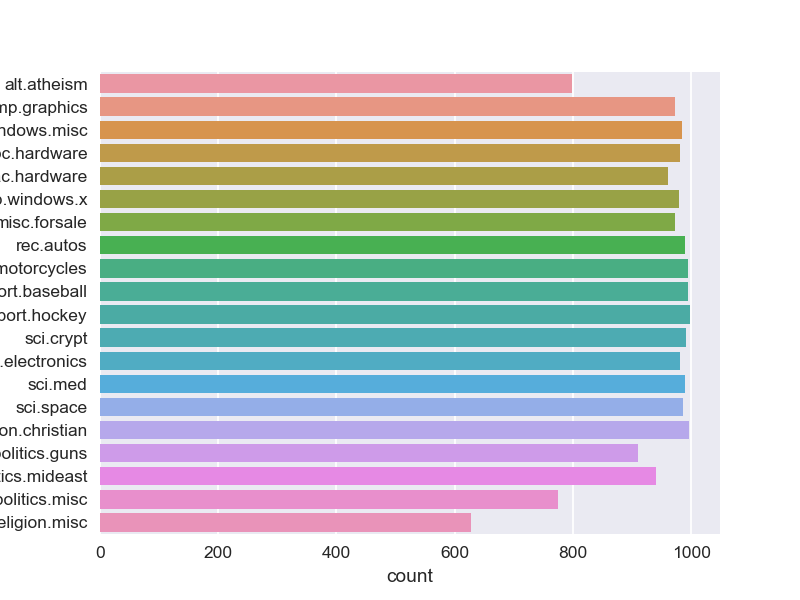

In [ ]:
### count plot of all the class labels. 

## Assignment:

#### sample document
<pre>
<font color='blue'>
Subject: A word of advice
From: jcopelan@nyx.cs.du.edu (The One and Only)

In article < 65882@mimsy.umd.edu > mangoe@cs.umd.edu (Charley Wingate) writes:
>
>I've said 100 times that there is no "alternative" that should think you
>might have caught on by now.  And there is no "alternative", but the point
>is, "rationality" isn't an alternative either.  The problems of metaphysical
>and religious knowledge are unsolvable-- or I should say, humans cannot
>solve them.

How does that saying go: Those who say it can't be done shouldn't interrupt
those who are doing it.

Jim
--
Have you washed your brain today?
</font>
</pre>

### Preprocessing:
<pre>
useful links: <a href='http://www.pyregex.com/'>http://www.pyregex.com/</a>

<font color='blue'><b>1.</b></font> Find all emails in the document and then get the text after the "@". and then split those texts by '.' 
after that remove the words whose length is less than or equal to 2 and also remove'com' word and then combine those words by space. 
In one doc, if we have 2 or more mails, get all.
<b>Eg:[test@dm1.d.com, test2@dm2.dm3.com]-->[dm1.d.com, dm3.dm4.com]-->[dm1,d,com,dm2,dm3,com]-->[dm1,dm2,dm3]-->"dm1 dm2 dm3" </b> 
append all those into one list/array. ( This will give length of 18828 sentences i.e one list for each of the document). 
Some sample output was shown below. 

> In the above sample document there are emails [jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu]

preprocessing:
[jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu] ==> [nyx cs du edu mimsy umd edu cs umd edu] ==> 
[nyx edu mimsy umd edu umd edu]

<font color='blue'><b>2.</b></font> Replace all the emails by space in the original text. 
</pre>

In [ ]:
# we have collected all emails and preprocessed them, this is sample output
preprocessed_email

array(['juliet caltech edu',
       'coding bchs edu newsgate sps mot austlcm sps mot austlcm sps mot com  dna bchs edu',
       'batman bmd trw', ..., 'rbdc wsnc org dscomsa desy zeus  desy',
       'rbdc wsnc org morrow stanford edu pangea Stanford EDU',
       'rbdc wsnc org apollo apollo'], dtype=object)

In [ ]:
len(preprocessed_email)

18828

<pre>
<font color='blue'><b>3.</b></font> Get subject of the text i.e. get the total lines where "Subject:" occur and remove 
the word which are before the ":" remove the newlines, tabs, punctuations, any special chars.
<b>Eg: if we have sentance like "Subject: Re: Gospel Dating @ \r\r\n" --> You have to get "Gospel Dating"</b> 
Save all this data into another list/array. 

<font color='blue'><b>4.</b></font> After you store it in the list, Replace those sentances in original text by space.

<font color='blue'><b>5.</b></font> Delete all the sentances where sentence starts with <b>"Write to:"</b> or <b>"From:"</b>.
> In the above sample document check the 2nd line, we should remove that

<font color='blue'><b>6.</b></font> Delete all the tags like "< anyword >"
> In the above sample document check the 4nd line, we should remove that "< 65882@mimsy.umd.edu >"


<font color='blue'><b>7.</b></font> Delete all the data which are present in the brackets. 
In many text data, we observed that, they maintained the explanation of sentence 
or translation of sentence to another language in brackets so remove all those.
<b>Eg: "AAIC-The course that gets you HIRED(AAIC - Der Kurs, der Sie anstellt)" --> "AAIC-The course that gets you HIRED"</b>

> In the above sample document check the 4nd line, we should remove that "(Charley Wingate)"


<font color='blue'><b>8.</b></font> Remove all the newlines('\n'), tabs('\t'), "-", "\".

<font color='blue'><b>9.</b></font> Remove all the words which ends with <b>":"</b>.
<b>Eg: "Anyword:"</b>
> In the above sample document check the 4nd line, we should remove that "writes:"


<font color='blue'><b>10.</b></font> Decontractions, replace words like below to full words. 
please check the donors choose preprocessing for this 
<b>Eg: can't -> can not, 's -> is, i've -> i have, i'm -> i am, you're -> you are, i'll --> i will </b>

<b> There is no order to do point 6 to 10. but you have to get final output correctly</b>

<font color='blue'><b>11.</b></font> Do chunking on the text you have after above preprocessing. 
Text chunking, also referred to as shallow parsing, is a task that 
follows Part-Of-Speech Tagging and that adds more structure to the sentence.
So it combines the some phrases, named entities into single word.
So after that combine all those phrases/named entities by separating <b>"_"</b>. 
And remove the phrases/named entities if that is a "Person". 
You can use <b>nltk.ne_chunk</b> to get these. 
Below we have given one example. please go through it. 

useful links: 
<a href='https://www.nltk.org/book/ch07.html'>https://www.nltk.org/book/ch07.html</a>
<a href='https://stackoverflow.com/a/31837224/4084039'>https://stackoverflow.com/a/31837224/4084039</a>
<a href='http://www.nltk.org/howto/tree.html'>http://www.nltk.org/howto/tree.html</a>
<a href='https://stackoverflow.com/a/44294377/4084039'>https://stackoverflow.com/a/44294377/4084039</a>
</pre>

In [ ]:
#i am living in the New York
print("i am living in the New York -->", list(chunks))
print(" ")
print("-"*50)
print(" ")
#My name is Srikanth Varma
print("My name is Srikanth Varma -->", list(chunks1))

i am living in the New York --> [('i', 'NN'), ('am', 'VBP'), ('living', 'VBG'), ('in', 'IN'), ('the', 'DT'), Tree('GPE', [('New', 'NNP'), ('York', 'NNP')])]
 
--------------------------------------------------
 
My name is Srikanth Varma --> [('My', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), Tree('PERSON', [('Srikanth', 'NNP'), ('Varma', 'NNP')])]


<pre>We did chunking for above two lines and then We got one list where each word is mapped to a 
POS(parts of speech) and also if you see "New York" and "Srikanth Varma", 
they got combined and represented as a tree and "New York" was referred as "GPE" and "Srikanth Varma" was referred as "PERSON". 
so now you have to Combine the "New York" with <b>"_"</b> i.e "New_York"
and remove the "Srikanth Varma" from the above sentence because it is a person.</pre>

<pre>
<font color='blue'><b>13.</b></font> Replace all the digits with space i.e delete all the digits. 
> In the above sample document, the 6th line have digit 100, so we have to remove that.

<font color='blue'><b>14.</b></font> After doing above points, we observed there might be few word's like
 <b> "_word_" (i.e starting and ending with the _), "_word" (i.e starting with the _),
  "word_" (i.e ending with the _)</b> remove the <b>_</b> from these type of words. 

<font color='blue'><b>15.</b></font>  We also observed some words like <b> "OneLetter_word"- eg: d_berlin, 
"TwoLetters_word" - eg: dr_berlin </b>, in these words we remove the "OneLetter_" (d_berlin ==> berlin) and 
"TwoLetters_" (de_berlin ==> berlin). i.e remove the words 
which are length less than or equal to 2 after spliiting those words by "_". 

<font color='blue'><b>16.</b></font> Convert all the words into lower case and lowe case 
and remove the words which are greater than or equal to 15 or less than or equal to 2.

<font color='blue'><b>17.</b></font> replace all the words except "A-Za-z_" with space. 

<font color='blue'><b>18.</b></font> Now You got Preprocessed Text, email, subject. create a dataframe with those. 
Below are the columns of the df. 
</pre>

In [ ]:
data.columns

Index(['text', 'class', 'preprocessed_text', 'preprocessed_subject',
       'preprocessed_emails'],
      dtype='object')


In [ ]:
data.iloc[400]

text                    From: arc1@ukc.ac.uk (Tony Curtis)\r\r\r\nSubj...
class                                                         alt.atheism
preprocessed_text       said re is article if followed the quoting rig...
preprocessed_subject                                christian morality is
preprocessed_emails                                   ukc mac macalstr edu
Name: 567, dtype: object


### To get above mentioned data frame --> Try to Write Total Preprocessing steps in One Function Named Preprocess as below. 

In [ ]:
def preprocess(Input_Text):
    """Do all the Preprocessing as shown above and
    return a tuple contain preprocess_email,preprocess_subject,preprocess_text for that Text_data"""
    return (list_of_preproessed_emails,subject,text)

### Code checking:

<font color='red' size=4>
After Writing preprocess function. call that functoin with the input text of 'alt.atheism_49960' doc and print the output of the preprocess function
<br>
This will help us to evaluate faster, based on the output we can suggest you if there are any changes.
</font>

### After writing Preprocess function, call the function for each of the document(18828 docs) and then create a dataframe as mentioned above.

### Training The models to Classify: 

<pre>
1. Combine "preprocessed_text", "preprocessed_subject", "preprocessed_emails" into one column. use that column to model. 

2. Now Split the data into Train and test. use 25% for test also do a stratify split. 

3. Analyze your text data and pad the sequnce if required. 
Sequnce length is not restricted, you can use anything of your choice. 
you need to give the reasoning

4. Do Tokenizer i.e convert text into numbers. please be careful while doing it. 
if you are using tf.keras "Tokenizer" API, it removes the <b>"_"</b>, but we need that.

5. code the model's ( Model-1, Model-2 ) as discussed below 
and try to optimize that models.  

6. For every model use predefined Glove vectors. 
<b>Don't train any word vectors while Training the model.</b>

7. Use "categorical_crossentropy" as Loss. 

8. Use <b>Accuracy and Micro Avgeraged F1 score</b> as your as Key metrics to evaluate your model. 

9.  Use Tensorboard to plot the loss and Metrics based on the epoches.

10. Please save your best model weights in to <b>'best_model_L.h5' ( L = 1 or 2 )</b>. 

11. You are free to choose any Activation function, learning rate, optimizer.
But have to use the same architecture which we are giving below.

12. You can add some layer to our architecture but you <b>deletion</b> of layer is not acceptable.

13. Try to use <b>Early Stopping</b> technique or any of the callback techniques that you did in the previous assignments.

14. For Every model save your model to image ( Plot the model) with shapes 
and inlcude those images in the notebook markdown cell, 
upload those imgages to Classroom. You can use "plot_model" 
please refer <a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>this</a> if you don't know how to plot the model with shapes. 

</pre>

### Model-1: Using 1D convolutions with word embeddings

<pre>
<b>Encoding of the Text </b> --> For a given text data create a Matrix with Embedding layer as shown Below. 
In the example we have considered d = 5, but in this assignment we will get d = dimension of Word vectors we are using.
 i.e if we have maximum of 350 words in a sentence and embedding of 300 dim word vector, 
 we result in 350*300 dimensional matrix for each sentance as output after embedding layer
<img src='https://i.imgur.com/kiVQuk1.png'>
Ref: https://i.imgur.com/kiVQuk1.png

<b>Reference:</b>
<a href='https://stackoverflow.com/a/43399308/4084039'>https://stackoverflow.com/a/43399308/4084039</a>
<a href='https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/'>https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</a>

<b><a href='https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work'>How EMBEDDING LAYER WORKS </a></b>

</pre>

### Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

<img src='https://i.imgur.com/fv1GvFJ.png'>
ref: 'https://i.imgur.com/fv1GvFJ.png'

<pre>
1. all are Conv1D layers with any number of filter and filter sizes, there is no restriction on this.

2. use concatenate layer is to concatenate all the filters/channels. 

3. You can use any pool size and stride for maxpooling layer.

4. Don't use more than 16 filters in one Conv layer becuase it will increase the no of params. 
( Only recommendation if you have less computing power )

5. You can use any number of layers after the Flatten Layer.
</pre>

### Model-2 : Using 1D convolutions with character embedding

<pre>
<pre><img src="https://i.ytimg.com/vi/CNY8VjJt-iQ/maxresdefault.jpg" width="70%">
Here are the some papers based on Char-CNN
 1. Xiang Zhang, Junbo Zhao, Yann LeCun. <a href="http://arxiv.org/abs/1509.01626">Character-level Convolutional Networks for Text Classification</a>.NIPS 2015
 2. Yoon Kim, Yacine Jernite, David Sontag, Alexander M. Rush. <a href="https://arxiv.org/abs/1508.06615">Character-Aware Neural Language Models</a>. AAAI 2016
 3. Shaojie Bai, J. Zico Kolter, Vladlen Koltun. <a href="https://arxiv.org/pdf/1803.01271.pdf">An Empirical Evaluation of Generic Convolutional and Recurrent Networks for Sequence Modeling</a>
 4. Use the pratrained char embeddings <a href='https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt'>https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt</a>
</pre>

<img src='https://i.imgur.com/EuuoJtr.png'>

In [ ]:
from nltk.chunk import ne_chunk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk import Tree
from nltk import RegexpParser
import re
import numpy as np
import os
import pandas as pd
from tqdm import tqdm

# Decontraction

In [ ]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
o="It's"
decontracted(o)

'It is'

In [ ]:
def email_extractor(input_text):
    pattern = re.compile("@")
    path="documents/"
    ppp=[]
    words=[]
    at_word=[]
    for line in open(input_text):
        for match in re.finditer(pattern, line):
            line = re.sub(r'\<','',line)
            line = re.sub(r'\>','',line)   
            line = re.sub(r'\,','',line)
            words.extend(line.split())
    for word in words:
        if '@' in word:
            at_word.append(word)
    split_at_words=[]
    for word in at_word:
        split_at_words.append(word.split('@'))
    op=[]
    for i in split_at_words:
        op.append(i[-1])
    pp=[]
    
    for i in op:
        tt= i.split('.')
        for j in tt:
                if not j == 'com' and len(j)>2:
                    pp.append(j)
    ppp.append(pp)
    for ii in ppp:
        strng=" "
        tt=strng.join(ii)
        email=tt.lower() #email is list which contains preprocessed email
    return(email)


In [ ]:
def subject_extractor(input_text):
    #--------------SUBJECT EXTRACTION ----------------

    path="documents/"


    with open(input_text) as f:
        for j,line in enumerate(f):
            if 'Subject:' in line:
                line = re.sub(r'\w*:','',line)
                line = re.sub(r'\W',' ',line)
                line.strip()
                subject=line.lower() #subject is list which contains preprocessed subject
                break
    return(subject)
    

In [ ]:
def text_extractor(input_text):
    #--------------TEXT EXTRACTION ----------------
    with open(input_text) as fp:
        content=fp.read()
    with open(input_text) as f:
        content = decontracted(content)

        for j,line in enumerate(f):
            line = decontracted(line)

            if 'From:' in line:
                content=content.replace(line,"")   
            if 'Subject:' in line:
                content=content.replace(line,"")
            if 'Write to:' in line:
                content=content.replace(line,"")
            if '@' in line:
                content=content.replace(line,"")

            words = line.split()
            for word in words:
                if word.endswith(':'):
                    content=content.replace(line,"")
                    break
        words = content.split()
        cleaned_words=[]
            #d_berlin ==> berlin ,de_berlin ==> berlin
        for ii in words:
            if '_' in ii:
                words_with_underscore = ii.split('_')
                if len(words_with_underscore[0])>2 and len(words_with_underscore[1])>2:
                    cleaned_words.append(ii)
                else:
                    for kk in words_with_underscore:
                        if len(kk)>2:
                            cleaned_words.append(kk)
            else:
                cleaned_words.append(ii)
        a=" "
        content=a.join(cleaned_words)
        content=re.sub("\d", "",content) # remove digits
        content = re.sub(r'\w*:',' ',content) # remove words ending with :
        content=re.sub("[\(\[].*?[\)\]]", " ", content) # remove words inside brackets
        content=re.sub("[\<\[].*?[\>\]]", "",content) # remove tags
        content = re.sub(r'\w\w_',' ',content)
        content = re.sub(r'\w_',' ',content)
        content = re.sub(r'[\n,\t,\\,\.,\-,\$,(,\",\',\<,\>,\/,\|]',' ',content) #remove special characters other than underscore 
        content = content.lower() #converting to lowercase
        words1 = content.split()
            #Removing words with leength less than or equal to 2 or greater than or equal to 15
        cleaned_words=[]
        for i in words1:
            if len(i)>=2 and len(i)<=15:
                cleaned_words.append(i)
        a=' '
        content=a.join(cleaned_words)

    text= content#text is list which contains preprocessed text
    return(text)


## Shallow Parsing

In [ ]:
def chunk_treat_names_places(text):
    token = list(ne_chunk(pos_tag(word_tokenize(text))))
    chunks = r"""Nouns : {<NNP><NN.*><.*>*<NN.*>}
                       }<VB.?|JJ.?|DT|IN|TO>+{"""
    chunkParser = RegexpParser(chunks)
    chunked = chunkParser.parse(token)
    for i in chunked:
        if type(i)==Tree:
            if i.label() == "GPE":
                j = i.leaves()
                if len(j)>1:   #if new_delhi or bigger name
                    gpe = "_".join([term for term,pos in j])
                    text  = re.sub(rf'{j[1][0]}',gpe,text, flags=re.MULTILINE)              #replacing delhi with new_delhi
                    text = re.sub(rf'\b{j[0][0]}\b',"",text, flags=re.MULTILINE)       #deleting new, \b is important
            if i.label()=="PERSON":           # deleting Ramesh
                for term,pog in i.leaves():
                    text = re.sub(term,"",text, flags=re.MULTILINE)

    return str(text)


In [ ]:
def preprocess(file):
    """Do all the Preprocessing as shown above and
    return a tuple contain preprocess_email,preprocess_subject,preprocess_text for that Text_data"""
    path="documents/"
    import os
    path = "documents/"
    if type(file) is list:
        text=[]
        pre_email=[]
        pre_subject=[]
        pre_text=[]
        n = len(file)
        clas=[]
        for i in tqdm(range(n)):
            with open(path+file[i]) as fp:
                text.append(fp.read())  
            a = file[i].split('_')
            clas.append(a[0])
            pre_email.append(email_extractor(path+file[i]))
            pre_subject.append(subject_extractor(path+file[i]))
            text_pre=text_extractor(path+file[i])
            pre_text.append(chunk_treat_names_places(str(text_pre)))

    elif type(file) is str:
        with open(path+file) as fp:
            text=fp.read()
        a = file.split('_')
        clas = a[0]
        #print(type(pre_email))
        pre_email=str(email_extractor(path+file))
        pre_subject=subject_extractor(path+file)
        text_pre=text_extractor(path+file)
        pre_text=chunk_treat_names_places(str(text_pre))
    else:
        print("Give valid input to the function")
        exit()
    return(text,clas,pre_email,pre_subject,pre_text)

In [ ]:
path = "documents/"
files=os.listdir(path)
text,clas,preprocessed_email,preprocessed_subject,preprocessed_text = preprocess(files)

100%|██████████| 18828/18828 [44:51<00:00,  6.99it/s]  


In [ ]:
path = "documents/"
files=os.listdir(path)
text,clas,preprocessed_email,preprocessed_subject,preprocessed_text = preprocess(files)

100%|██████████| 18828/18828 [50:23<00:00,  6.23it/s]  


In [ ]:
import pandas as pd
df = pd.DataFrame()
df['text'] = text
df['class'] = clas
df['preprocessed email'] = preprocessed_email
df['preprocessed subject'] = preprocessed_subject
df['preprocessed text'] = preprocessed_text
df.head()

,text,class,preprocessed email,preprocessed subject,preprocessed text
0,From: mathew <mathew@mantis.co.uk>\nSubject: A...,alt.atheism,mantis netcom mantis,alt atheism atheist resources,atheist resources addresses of atheist organiz...
1,From: mathew <mathew@mantis.co.uk>\nSubject: A...,alt.atheism,mantis mantis mantis,alt atheism introduction to atheism,begin pgp signed message an introduction to at...
2,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,alt.atheism,dbstu1 tu-bs mimsy umd edu umd edu,gospel dating,well john has quite different not necessarily ...
3,From: mathew <mathew@mantis.co.uk>\nSubject: R...,alt.atheism,mantis kepler unh edu,university violating separation of church st...,recently ras have been ordered it is some sort...
4,From: strom@Watson.Ibm.Com (Rob Strom)\nSubjec...,alt.atheism,watson ibm com harder ccr-p ida org harder ccr...,soc motss et al princeton axes matching...,however hate economic terrorism and political ...


In [ ]:
df.to_csv("preprocessed.csv")

In [ ]:
text,classs,pre_email,pre_subject,pre_text=preprocess("alt.atheism_49960.txt")

In [ ]:
classs

'alt.atheism'

In [ ]:
pre_email

'mantis netcom mantis'

In [ ]:
pre_subject

' alt atheism  atheist resources '

In [ ]:
pre_text

'atheist resources addresses of atheist organizations usa freedom from religion foundation darwin fish bumper stickers and assorted other atheist paraphernalia are available from the freedom from religion foundation in the us evolution designs evolution designs sell the darwin fish it is fish symbol like the ones christians stick on their cars but with feet and the word darwin written inside the deluxe moulded plastic fish is postpaid in the us ca people in the san francisco bay area can get darwin fish from lynn gold price is per fish american atheist press aap publish various atheist books critiques of the bible lists of the bible handbook by ball and foote american atheist press pp isbn nd edition bible contradictions contradicts itself aap based on the king james version of the bible prometheus books sell books including haught is holy horrors prometheus books glenn drive buffalo ny african americans for humanism an organization promoting black secular humanism and uncovering the h

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [7]:
import numpy as np
import scipy
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score,roc_curve,auc
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/preprocessed.csv")

In [4]:
data=data.drop('Unnamed: 0',axis=1)
data.head()

,text,class,preprocessed email,preprocessed subject,preprocessed text
0,From: mathew <mathew@mantis.co.uk>\nSubject: A...,alt.atheism,mantis netcom mantis,alt atheism atheist resources,atheist resources addresses of atheist organiz...
1,From: mathew <mathew@mantis.co.uk>\nSubject: A...,alt.atheism,mantis mantis mantis,alt atheism introduction to atheism,begin pgp signed message an introduction to at...
2,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,alt.atheism,dbstu1 tu-bs mimsy umd edu umd edu,gospel dating,well john has quite different not necessarily ...
3,From: mathew <mathew@mantis.co.uk>\nSubject: R...,alt.atheism,mantis kepler unh edu,university violating separation of church st...,recently ras have been ordered it is some sort...
4,From: strom@Watson.Ibm.Com (Rob Strom)\nSubjec...,alt.atheism,watson ibm com harder ccr-p ida org harder ccr...,soc motss et al princeton axes matching...,however hate economic terrorism and political ...


In [5]:
combined_columns=[]
from tqdm import tqdm
for i in tqdm(range(data.shape[0])):
  combined_columns.append(str(data['preprocessed email'][i])+str(data['preprocessed subject'][i])+str(data['preprocessed text'][i]))
 
combined_columns = pd.DataFrame(combined_columns)

100%|██████████| 18828/18828 [00:00<00:00, 52512.30it/s]


In [ ]:
y = data['class']
X = combined_columns
    
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y)
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [ ]:
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import OneHotEncoder
import pickle
import nltk
nltk.download('punkt')
train = X_train[0]
train = train.apply(word_tokenize)
 

tokenizer = Tokenizer(num_words= 10000)
tokenizer = Tokenizer(num_words= 10000)
tokenizer.fit_on_texts(train)
sequences = tokenizer.texts_to_sequences(train)
length_sequences = list()


for i in sequences:
    length_sequences.append(len(i))
max_length = 1000


from tensorflow.keras.preprocessing.sequence import pad_sequences
train = pad_sequences(sequences,maxlen = max_length,padding='post')
vocab_length_train = len(tokenizer.word_index)
 
with open('/content/drive/MyDrive/data/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())
total_words = vocab_length_train + 1
skipped_words = 0
embedding_dim = 300
embedding_matrix = np.zeros((total_words, embedding_dim))
for word, index in tokenizer.word_index.items():
    try:
        embedding_vector = model[word]
    except:
        skipped_words = skipped_words+1
    pass
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
 
 

encoder = OneHotEncoder()
y_train_ohe = encoder.fit_transform(np.array(y_train).reshape(-1,1))
y_test_ohe = encoder.fit_transform(np.array(y_test).reshape(-1,1))
y_train_ohe1 = scipy.sparse.csr_matrix.todense(y_train_ohe)
y_test_ohe1 = scipy.sparse.csr_matrix.todense(y_test_ohe)
val = X_test[0]
val = val.apply(word_tokenize)


sequences_val = tokenizer.texts_to_sequences(val)
val = pad_sequences(sequences_val,maxlen = max_length,padding='post')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
vocab_length_train=len(tokenizer.word_index)
text_input= tf.keras.Input(shape=(max_length,),dtype='int32',name="input_seq_total_text_data")
text_embedding = layers.Embedding(input_dim = len(embedding_matrix), output_dim = 300, input_length=max_length,weights=[embedding_matrix],trainable=False)(text_input)
 
conv1_m = layers.Conv1D(16,3,activation='relu')(text_embedding)
conv1_n = layers.Conv1D(14,3,activation='relu')(text_embedding)
conv1_o = layers.Conv1D(12,3,activation='relu')(text_embedding)
 
x = layers.concatenate([conv1_m,conv1_n,conv1_o])
x = layers.MaxPool1D(2)(x)
 
conv1_i = layers.Conv1D(15,3,activation='relu')(x)
conv1_j = layers.Conv1D(13,3,activation='relu')(x)
conv1_k = layers.Conv1D(11,3,activation='relu')(x)
 
x = layers.concatenate([conv1_i,conv1_j,conv1_k])
x = layers.MaxPool1D()(x)
x = layers.Conv1D(16,8,activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128)(x)
x = layers.Dense(20,activation='softmax',name="output")(x)
model = keras.Model(
    inputs=[text_input],
    outputs=[x],
)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_seq_total_text_data (Inpu [(None, 1000)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1000, 300)    26987700    input_seq_total_text_data[0][0]  
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 998, 16)      14416       embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 998, 14)      12614       embedding[0][0]                  
______________________________________________________________________________________________

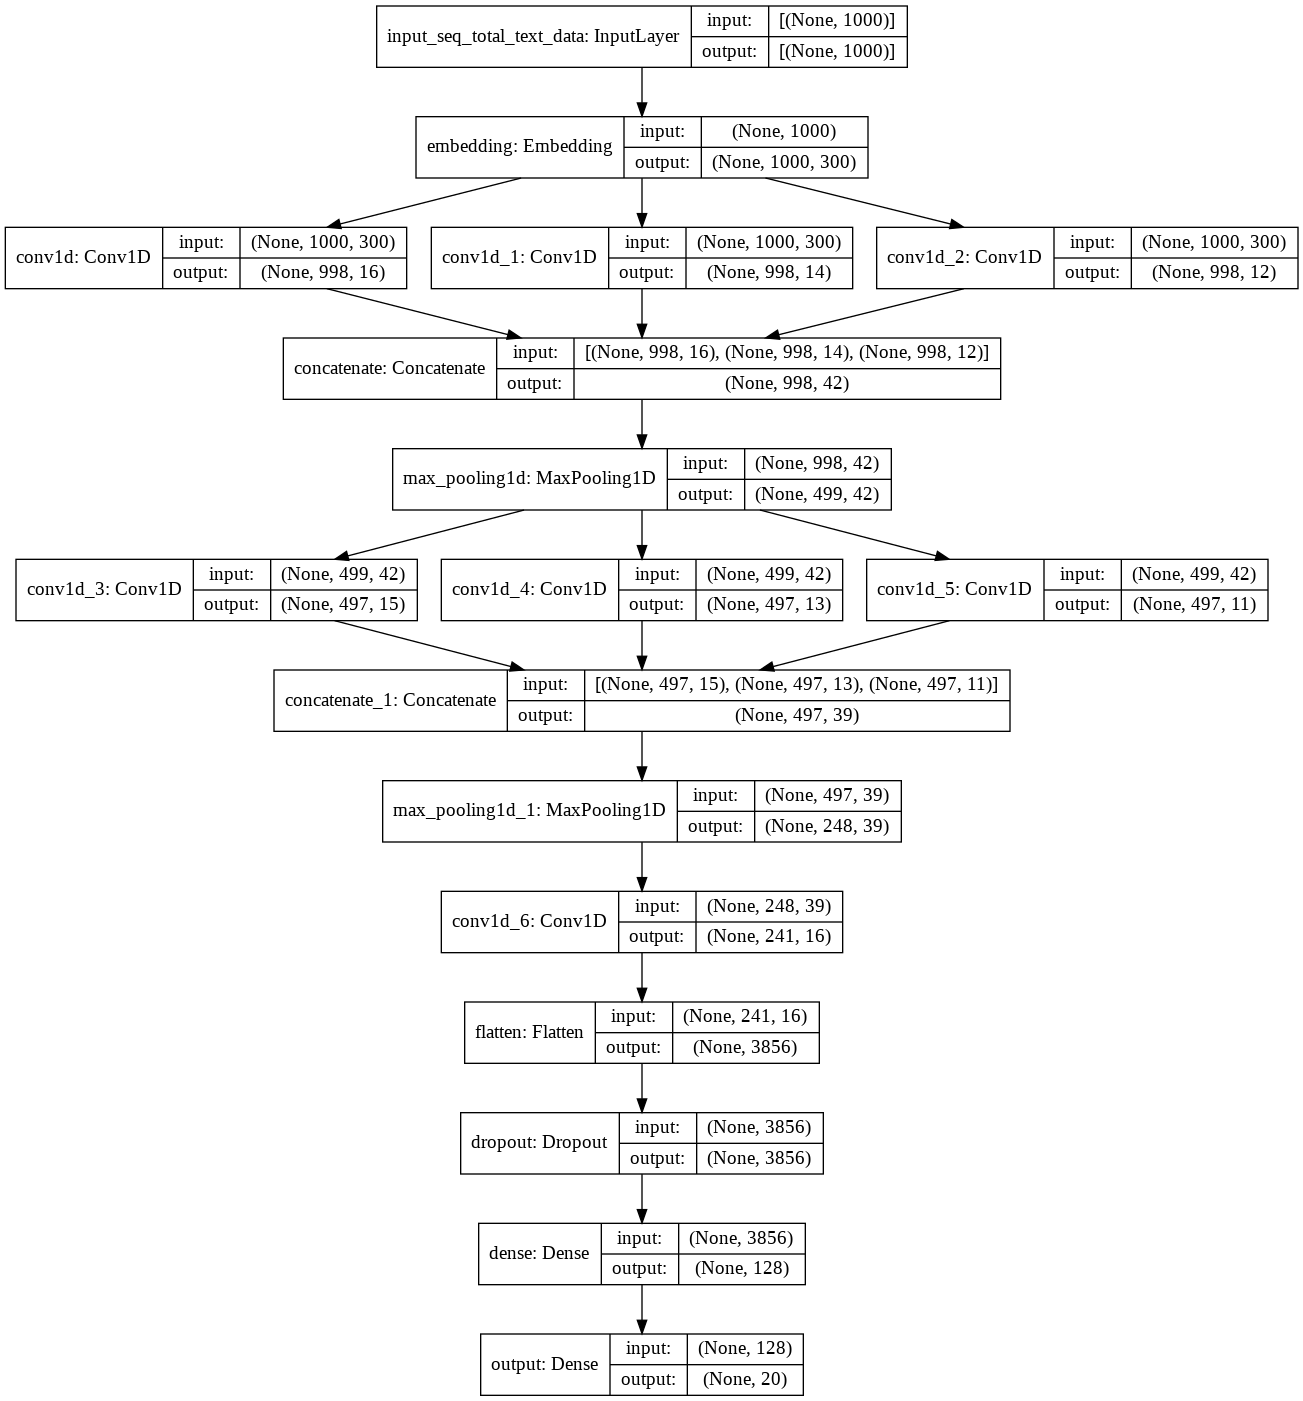

In [ ]:
keras.utils.plot_model(model,show_shapes=True)

In [ ]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()  
y_train_enc= label_encoder.fit_transform(y_train) 
y_test_enc= label_encoder.transform(y_test)
 
from keras.utils import np_utils
ytr = np_utils.to_categorical(y_train_enc,20)
yte = np_utils.to_categorical(y_test_enc,20)

In [ ]:
#https://towardsdatascience.com/neural-network-with-tensorflow-how-to-stop-training-using-callback-5c8d575c18a9
class myCallback(tf.keras.callbacks.Callback):     
  def on_epoch_end(self, epoch, logs={}):         
    if(logs.get('val_accuracy') > 0.70):             
      print("\nReached 70+ validation accuracy, so stopping training!!" )             
      self.model.stop_training = True 

In [ ]:
from sklearn.metrics import f1_score
class metrics(tf.keras.callbacks.Callback):     
  def __init__(self,validationx,valy):         
    super(metrics, self).__init__()         
    self.validationx = validationx         
    self.valy = valy      
 
  def on_epoch_end(self, epoch, logs={}):         
    y_pred = (np.asarray(self.model.predict(self.validationx))).round()       
    y_true = (np.squeeze(np.asarray(self.valy)))         
    val_f1 = f1_score(y_true, y_pred,average='samples')       
    print("F1 Score : "+str(val_f1))         
    return 


In [ ]:
import datetime 
import os
os.mkdir("/content/m1logss") 
log_dir = "/content/m1logss/model_log"+datetime.datetime.now().strftime("%Y%n%d-%H%M%S") 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1) 

In [ ]:
#compile 
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9),loss='categorical_crossentropy',metrics=['accuracy'])

train_input = train
val_input = val

train_output = ytr
val_output = yte
metrics_callback = metrics(val_input,yte)

#train
tf.keras.backend.clear_session()
history=model.fit(train_input,train_output,batch_size=100,epochs=100,validation_data=(val_input,yte),callbacks=[myCallback(),metrics_callback,tensorboard_callback])

Epoch 1/100
142/142 [==============================] - 11s 70ms/step - loss: 3.0547 - accuracy: 0.0611 - val_loss: 2.9516 - val_accuracy: 0.0822
F1 Score : 0.0
Epoch 2/100
142/142 [==============================] - 10s 69ms/step - loss: 2.9513 - accuracy: 0.0788 - val_loss: 2.9165 - val_accuracy: 0.0967
F1 Score : 0.0
Epoch 3/100
142/142 [==============================] - 10s 69ms/step - loss: 2.9028 - accuracy: 0.1009 - val_loss: 2.7861 - val_accuracy: 0.1321
F1 Score : 0.0006373486297004461
Epoch 4/100
142/142 [==============================] - 10s 69ms/step - loss: 2.7539 - accuracy: 0.1226 - val_loss: 2.5392 - val_accuracy: 0.1557
F1 Score : 0.0019120458891013384
Epoch 5/100
142/142 [==============================] - 10s 69ms/step - loss: 2.5421 - accuracy: 0.1584 - val_loss: 2.4005 - val_accuracy: 0.1961
F1 Score : 0.005948587210537497
Epoch 6/100
142/142 [==============================] - 10s 70ms/step - loss: 2.4258 - accuracy: 0.1856 - val_loss: 2.2712 - val_accuracy: 0.2243
F1

In [ ]:
model.save("'best_model_1.h5'")

INFO:tensorflow:Assets written to: 'best_model_1.h5'/assets


In [ ]:
saved_model = keras.models.load_model("'best_model_1.h5'")
score = saved_model.evaluate(val, yte, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

148/148 [==============================] - 2s 16ms/step - loss: 0.9698 - accuracy: 0.7060
Test loss: 0.9697709679603577
Test accuracy: 0.7059698104858398


## Loss Curve

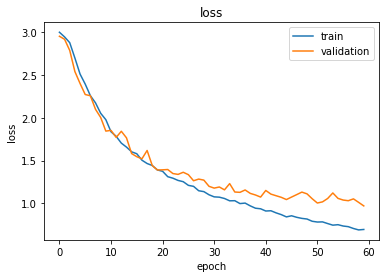

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("loss") 
plt.xlabel("epoch") 
plt.ylabel("loss") 
plt.legend(['train','validation']) 
plt.show() 

## Accuracy Curve

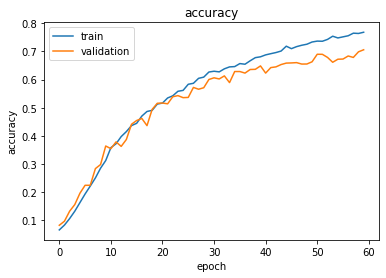

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("accuracy") 
plt.xlabel("epoch") 
plt.ylabel("accuracy") 
plt.legend(['train','validation']) 
plt.show() 

## Model 2

In [8]:
x = combined_columns
y = data['class']
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.25,random_state=30, stratify = y)

In [9]:
tokenizer_char = Tokenizer(char_level=True,filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
tokenizer_char.fit_on_texts(x_train[0])
sequences2 = tokenizer_char.texts_to_sequences(x_train[0])
sequences2_test = tokenizer_char.texts_to_sequences(x_test[0])
length_sequences2 = list()
for i in sequences2:
    length_sequences2.append(len(i))
max_length2 = max(length_sequences2)
vocab = len(tokenizer_char.word_index)


x_train_pad = pad_sequences(sequences2,maxlen = max_length2,padding='post')
x_test_pad = pad_sequences(sequences2_test,maxlen = max_length2,padding='post')


In [25]:
import tensorflow
input_layer_2 = tensorflow.keras.Input(shape=(max_length2,),dtype='int32')
embedding_2 = layers.Embedding(input_dim = vocab+1, output_dim = 4, input_length = max_length2,trainable=True)(input_layer_2)

conv1D_a = layers.Conv1D(filters=16, kernel_size=5, activation='relu',kernel_initializer = tensorflow.keras.initializers.he_uniform(10))(embedding_2)
conv1D_b = layers.Conv1D(filters=16, kernel_size=5, activation='relu',kernel_initializer = tensorflow.keras.initializers.he_uniform(14))(conv1D_a)

pool1 = layers.MaxPooling1D(pool_size=2,strides=None, padding="valid")(conv1D_b)

conv1D_c = layers.Conv1D(filters=16, kernel_size=3, activation='relu',kernel_initializer = tensorflow.keras.initializers.he_uniform(20))(pool1)
conv1D_d = layers.Conv1D(filters=16, kernel_size=3, activation='relu',kernel_initializer = tensorflow.keras.initializers.he_uniform(30))(conv1D_c)
conv1D_e = layers.Conv1D(filters=16, kernel_size=3,activation='relu',kernel_initializer = tensorflow.keras.initializers.he_uniform(40))(conv1D_d)

pool2 = layers.MaxPooling1D(pool_size=3,strides=None, padding="valid")(conv1D_e)
conv1D_f = layers.Conv1D(filters=4, kernel_size=1, activation='relu',kernel_initializer = tensorflow.keras.initializers.he_uniform(60))(pool2)
flatten_1 = layers.Flatten()(conv1D_f)

dropout1 = layers.Dropout(0.2)(flatten_1)

dens1 = layers.Dense(560,activation='tanh',kernel_initializer = tensorflow.keras.initializers.glorot_normal(2))(dropout1)
dropout2 = layers.Dropout(0.3)(dens1)

dens2 = layers.Dense(130,activation='tanh')(dropout2)
dropout3 = layers.Dropout(0.25)(dens2)

dens3 = layers.Dense(68,activation='relu',kernel_initializer = tensorflow.keras.initializers.he_uniform(50))(dropout3)
dropout4 = layers.Dropout(0.2)(dens3)

output = layers.Dense(20,activation='softmax',kernel_initializer=tensorflow.keras.initializers.glorot_normal(seed=0))(dens1)
model2 = keras.Model(inputs=input_layer_2,outputs=output)

print(model2.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 60619)]           0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 60619, 4)          360       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 60615, 16)         336       
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 60611, 16)         1296      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 30305, 16)         0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 30303, 16)         784       
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 30301, 16)         784 

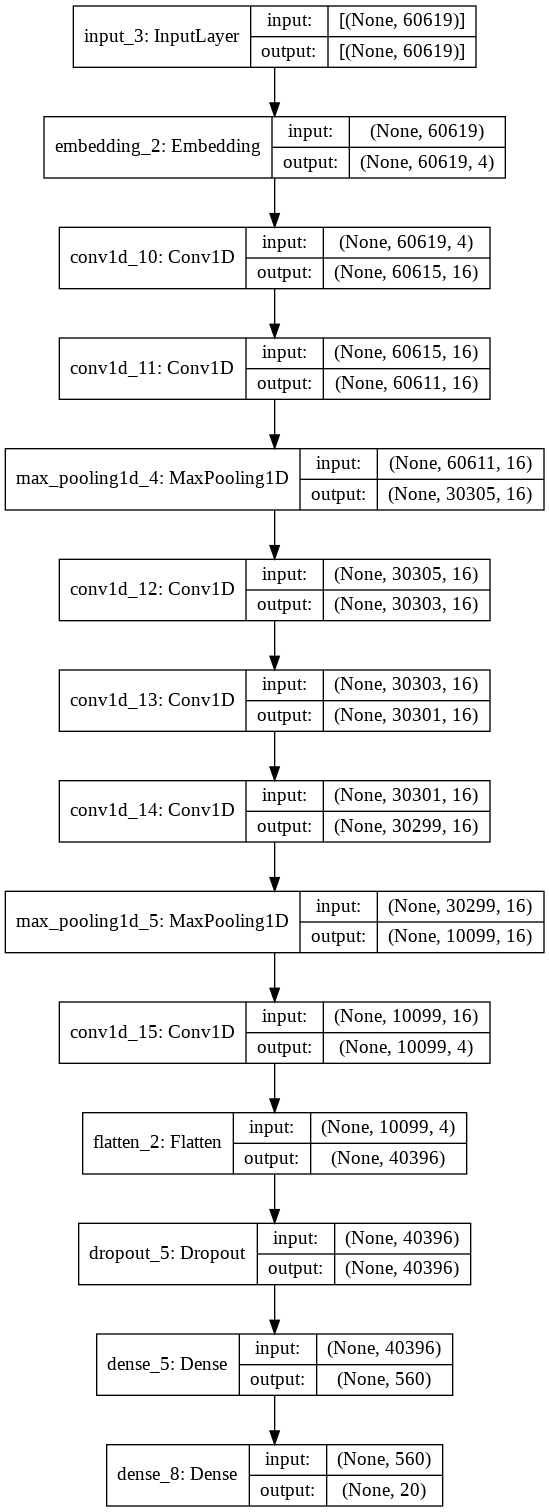

In [27]:
keras.utils.plot_model(model2,show_shapes=True)

In [16]:
#https://towardsdatascience.com/neural-network-with-tensorflow-how-to-stop-training-using-callback-5c8d575c18a9
class myCallback(tf.keras.callbacks.Callback):     
  def on_epoch_end(self, epoch, logs={}):         
    if(logs.get('val_accuracy') > 0.10):             
      print("\nReached 10+ validation accuracy, so stopping training!!" )             
      self.model.stop_training = True 

In [17]:
from sklearn.metrics import f1_score
class metrics(tf.keras.callbacks.Callback):     
  def __init__(self,validationx,valy):         
    super(metrics, self).__init__()         
    self.validationx = validationx         
    self.valy = valy      
 
  def on_epoch_end(self, epoch, logs={}):         
    y_pred = (np.asarray(self.model.predict(self.validationx))).round()       
    y_true = (np.squeeze(np.asarray(self.valy)))         
    val_f1 = f1_score(y_true, y_pred,average='samples')       
    print("F1 Score : "+str(val_f1))         
    return 


In [33]:
import datetime 
import os
os.mkdir("/content/m2__logss") 
log_dir = "/content/m2__logss/model_log"+datetime.datetime.now().strftime("%Y%n%d-%H%M%S") 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1) 

In [36]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()  
y_train_enc= label_encoder.fit_transform(y_train) 
y_test_enc= label_encoder.transform(y_test)

from keras.utils import np_utils
ytr = np_utils.to_categorical(y_train_enc,20)
yte = np_utils.to_categorical(y_test_enc,20)

model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),loss='categorical_crossentropy',metrics=['accuracy'])
metrics_callback = metrics(x_test_pad,yte)
history=model2.fit(x_train_pad,ytr,validation_data=(x_test_pad,yte), batch_size=100,epochs=100,callbacks=[myCallback(),metrics_callback,tensorboard_callback])

Epoch 1/100
142/142 [==============================] - 56s 388ms/step - loss: 2.9892 - accuracy: 0.0587 - val_loss: 2.9699 - val_accuracy: 0.0697
F1 Score : 0.0
Epoch 2/100
142/142 [==============================] - 55s 390ms/step - loss: 2.9579 - accuracy: 0.0701 - val_loss: 2.9240 - val_accuracy: 0.0865
F1 Score : 0.0
Epoch 3/100
142/142 [==============================] - 55s 388ms/step - loss: 2.9320 - accuracy: 0.0836 - val_loss: 2.9222 - val_accuracy: 0.0788
F1 Score : 0.0
Epoch 4/100
142/142 [==============================] - 55s 387ms/step - loss: 2.9261 - accuracy: 0.0857 - val_loss: 2.9189 - val_accuracy: 0.0814
F1 Score : 0.0
Epoch 5/100
142/142 [==============================] - 55s 390ms/step - loss: 2.9150 - accuracy: 0.0867 - val_loss: 2.9218 - val_accuracy: 0.0914
F1 Score : 0.0
Epoch 6/100
142/142 [==============================] - 55s 390ms/step - loss: 2.9120 - accuracy: 0.0939 - val_loss: 2.9217 - val_accuracy: 0.0822
F1 Score : 0.0
Epoch 7/100
142/142 [=============

In [37]:
model2.save("'best_model_2.h5'")

INFO:tensorflow:Assets written to: 'best_model_2.h5'/assets


In [38]:
saved_model = keras.models.load_model("'best_model_2.h5'")
score = saved_model.evaluate(x_test_pad, yte, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

148/148 [==============================] - 6s 42ms/step - loss: 3.0597 - accuracy: 0.1005
Test loss: 3.059715747833252
Test accuracy: 0.10048863291740417


## Loss curve

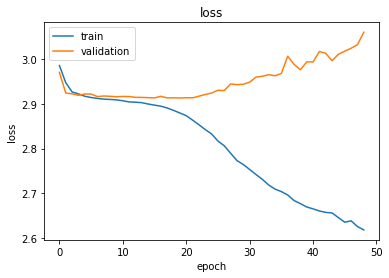

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("loss") 
plt.xlabel("epoch") 
plt.ylabel("loss") 
plt.legend(['train','validation']) 
plt.show() 

## Accuracy Lose

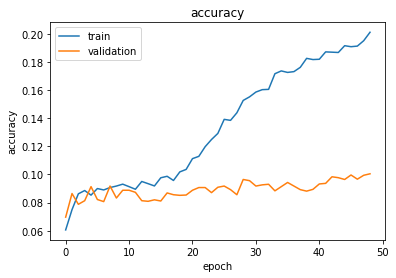

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("accuracy") 
plt.xlabel("epoch") 
plt.ylabel("accuracy") 
plt.legend(['train','validation']) 
plt.show() 